# Configurações

In [1]:
#@title URL da imagem utilizada nas atividades
url_img = "http://optipng.sourceforge.net/pngtech/img/lena.png" # @param {type: "string"}

# Exercício 7.2 - Filtro Homórfico

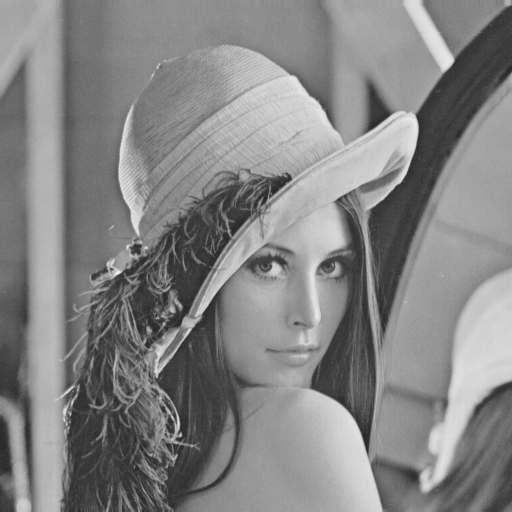

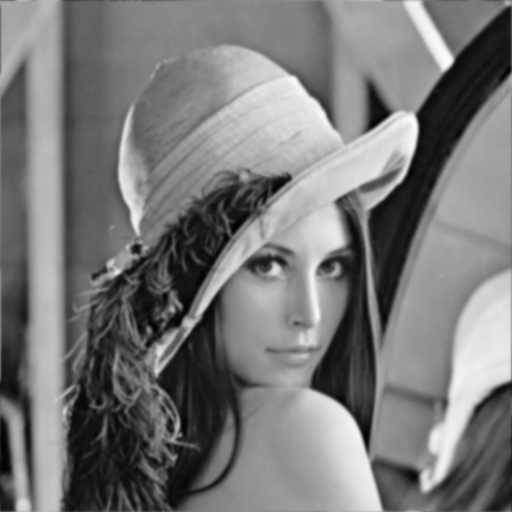

In [2]:
# Importação do OpenCV
import cv2
# Importação de utilidade para exibição da imagem
from google.colab.patches import cv2_imshow
# Importação de urllib para permitir download da imagem
import urllib.request
# Importação do numpy
import numpy as np

# Carrega a imagem a partir da URL definida
resp = urllib.request.urlopen(url_img)
img_array = np.asarray(bytearray(resp.read()), dtype="uint8")
img = cv2.imdecode(img_array, cv2.IMREAD_GRAYSCALE)
# Obtém o tamanho da imagem
altura, comprimento = img.shape[:2]

gama_H = 0.009 #@param {type:"slider", min:0, max:0.1, step:0.001}
gama_L = 1.07 #@param {type:"slider", min:0, max:5, step:0.01}
D_0 = 85 #@param {type:"slider", min:0, max:200, step:1}
c = 1 #@param {type:"slider", min:0, max:100, step:1}

transformada = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)
transformada_deslocada = np.fft.fftshift(transformada)

altura, comprimento = transformada_deslocada.shape[:2]

filtro = np.zeros((altura, comprimento))

for i in range(altura):
    for j in range(comprimento):
        filtro[i, j] = (
            (gama_H - gama_L) * (
                1 - np.exp(
                    -c* (( (i - altura/2)*(i - altura/2) + (j - comprimento/2) * (j - comprimento/2) ) / (D_0**2) )
                )
            ) + gama_L
        )

nova_img_freq = np.fft.ifftshift(filtro[:, :, None] * transformada_deslocada)
nova_img = cv2.idft(nova_img_freq)
nova_img = cv2.magnitude(nova_img[:,:,0], nova_img[:,:,1])
nova_img = (
    (nova_img - np.min(nova_img)) / (np.max(nova_img) - np.min(nova_img)) * 255
)

cv2_imshow(img)
cv2_imshow(nova_img)

# Exercício 8.3 - Pontilhismo + Canny

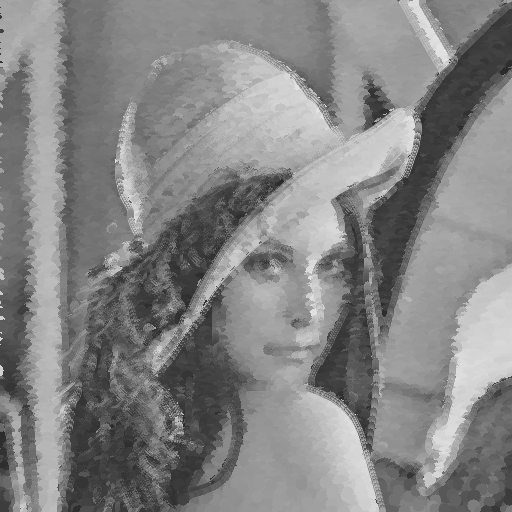

In [3]:
# Importação do OpenCV
import cv2
# Importação de utilidade para exibição da imagem
from google.colab.patches import cv2_imshow
# Importação de urllib para permitir download da imagem
import urllib.request
# Importação do numpy
import numpy as np
# Importação do gerador de numeros randômicos
from numpy.random import randint

# Carrega a imagem a partir da URL definida
resp = urllib.request.urlopen(url_img)
img_array = np.asarray(bytearray(resp.read()), dtype="uint8")
img = cv2.imdecode(img_array, cv2.IMREAD_GRAYSCALE)
# Obtém o tamanho da imagem
altura, comprimento = img.shape[:2]

nova_img = np.zeros((altura, comprimento), dtype=np.uint8)

JITTER = 30 # @param {type: "integer"}
RAIO = 6 # @param {type: "integer"}

bordas = cv2.Canny(img, 50, 200)

for i in range(altura):
    for j in range(comprimento):
        if randint(40) == 0:
            continue

        x = min(i + randint(2 * JITTER) - JITTER + 1, altura - 1)
        y = min(j + randint(2 * JITTER) - JITTER + 1, comprimento - 1)
        cv2.circle(nova_img, (y, x), RAIO, int(img[x, y]), -1)


for i in range(altura):
    for j in range(comprimento):
        if randint(80) == 0:
            continue

        x = min(i + randint(2 * JITTER) - JITTER + 1, altura - 1)
        y = min(j + randint(2 * JITTER) - JITTER + 1, comprimento - 1)

        if bordas[i, j] == 255:
            cv2.circle(nova_img, (j, i), RAIO // 2, int(img[i, j]), -1)

cv2_imshow(nova_img)

# Exercício 9.2 Quantização vetorial com k-means

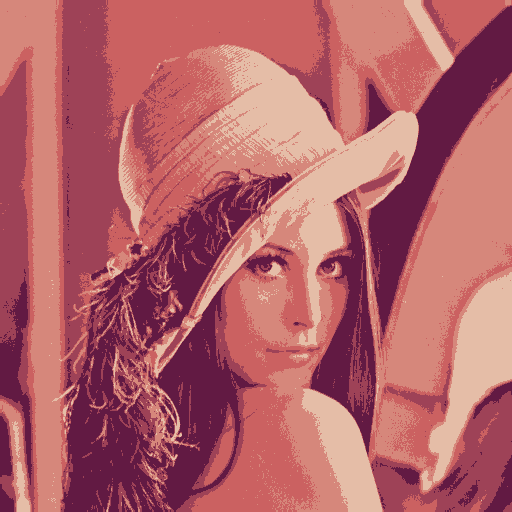

In [4]:
# Importação do OpenCV
import cv2
# Importação de utilidade para exibição da imagem
from google.colab.patches import cv2_imshow
# Importação de urllib para permitir download da imagem
import urllib.request
# Importação do numpy
import numpy as np
# Importação de função do kmeans
from scipy.cluster.vq import kmeans, vq

k = 5 # @param {type: "integer"}
numero_iteracoes = 10000

# Carrega a imagem a partir da URL definida
resp = urllib.request.urlopen(url_img)
img_array = np.asarray(bytearray(resp.read()), dtype="uint8")
img = cv2.imdecode(img_array, cv2.IMREAD_COLOR)
# Obtém o tamanho da imagem
altura, comprimento, canais = img.shape

nova_img = np.zeros((altura, comprimento), dtype=np.uint8)
cores = img.reshape(altura * comprimento, canais)
centroides, _ = kmeans(cores.astype(np.float32), k)
# assign each sample to a cluster
idx, nova_img = vq(cores, centroides)

nova_img = centroides[idx].reshape((altura, comprimento, canais))

cv2_imshow(nova_img)